In [3]:
import numpy as np
import matplotlib.cm as cmap
import os.path
import scipy
import scipy.signal as signal
import pickle as pickle
from brian2 import *
import brian2
from brian2tools import *
from PIL import Image
from struct import unpack
import matplotlib.pyplot as plt
import math
import time

In [6]:
stimuli_file = './pic_120_Z.tif'
fig_num = 1

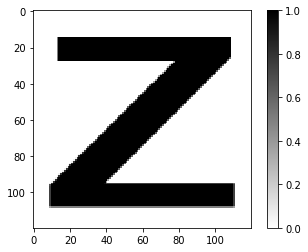

In [7]:
img = Image.open(stimuli_file)
img.load()
img_arr = np.asarray(img, dtype="int32")
stimuli = np.absolute(img_arr)/255

# fig = figure(fig_num, figsize = (10, 10))
im2 = imshow(stimuli, vmin = np.min(stimuli), vmax = np.max(stimuli) , cmap = cmap.get_cmap('gray_r'))
colorbar(im2)
fig_num += 1

In [9]:
def gaussian2D(x, y, sigma):
    return (1.0/(1*math.pi*(sigma**2)))*math.exp(-(1.0/((sigma**2)))*(x**2 + y**2))
#     return (1.0/(1*math.pi*(sigma**2)))*math.exp(-(1.0/(2*math.pi*(sigma**2)))*(x**2 + y**2))

In [10]:
def plotFilter(fun):
    g = receptiveFieldMatrix(fun) 
    im = imshow(g, cmap=cmap.get_cmap('gray_r'))
    colorbar(im)

In [11]:
def mexicanHat(x,y,sigma1,sigma2): 
    return gaussian2D(x,y,sigma1) - gaussian2D(x,y,sigma2)

In [12]:
def receptiveFieldMatrix(func):
    h = 7
    g = np.zeros((h,h))
    for xi in range(0,h):
        for yi in range(0,h):
            x = xi-int(h/2)
            y = yi-int(h/2)
            g[xi, yi] = func(x,y);
    return g

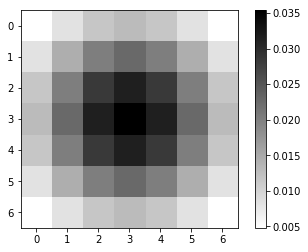

In [13]:
plotFilter(lambda x,y:gaussian2D(x,y,3))

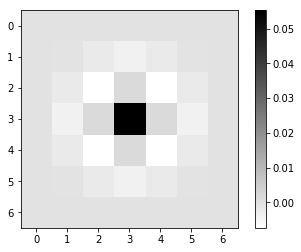

In [14]:
plotFilter(lambda x,y: mexicanHat(x,y,1,1.1))

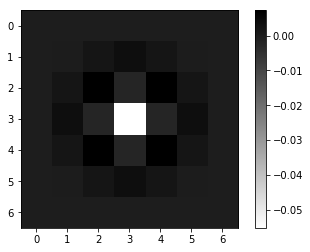

In [15]:
plotFilter(lambda x,y: mexicanHat(x,y,1.1,1))

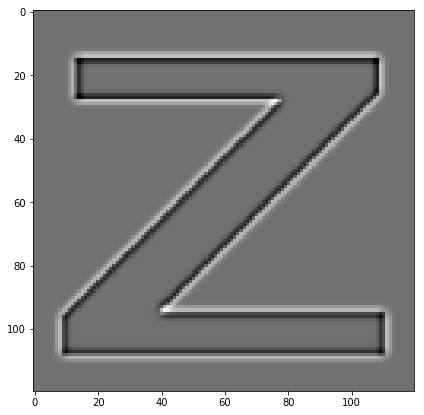

In [24]:
Img_barHat = signal.convolve(stimuli, receptiveFieldMatrix(lambda x,y:mexicanHat(x,y,1,1.5)), mode='same')
fig = figure(fig_num, figsize = (7, 7))
imgplot = imshow(Img_barHat, cmap=cmap.get_cmap('gray_r'))
fig_num += 1

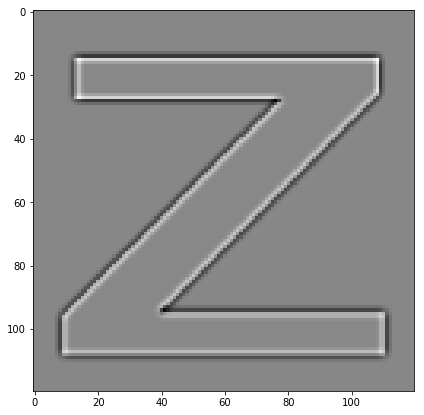

In [17]:
Img_barHat = signal.convolve(stimuli, receptiveFieldMatrix(lambda x,y:mexicanHat(x,y,1.1,1)), mode='same')
fig = figure(fig_num, figsize = (7, 7))
imgplot = imshow(Img_barHat, cmap=cmap.get_cmap('gray_r'))
fig_num += 1

In [18]:
receptiveFieldMatrix(lambda x,y:mexicanHat(x,y,1,1.1))

array([[-8.62452900e-08, -4.95714999e-06, -5.32901527e-05,
        -1.15518960e-04, -5.32901527e-05, -4.95714999e-06,
        -8.62452900e-08],
       [-4.95714999e-06, -2.46968793e-04, -2.07667357e-03,
        -3.81668987e-03, -2.07667357e-03, -2.46968793e-04,
        -4.95714999e-06],
       [-5.32901527e-05, -2.07667357e-03, -7.29732051e-03,
         1.98154065e-03, -7.29732051e-03, -2.07667357e-03,
        -5.32901527e-05],
       [-1.15518960e-04, -3.81668987e-03,  1.98154065e-03,
         5.52438645e-02,  1.98154065e-03, -3.81668987e-03,
        -1.15518960e-04],
       [-5.32901527e-05, -2.07667357e-03, -7.29732051e-03,
         1.98154065e-03, -7.29732051e-03, -2.07667357e-03,
        -5.32901527e-05],
       [-4.95714999e-06, -2.46968793e-04, -2.07667357e-03,
        -3.81668987e-03, -2.07667357e-03, -2.46968793e-04,
        -4.95714999e-06],
       [-8.62452900e-08, -4.95714999e-06, -5.32901527e-05,
        -1.15518960e-04, -5.32901527e-05, -4.95714999e-06,
        -8.6245290

In [167]:
arr = Img_barHat
if (np.amin(Img_barHat) < 0):
    arr = Img_barHat + abs(np.amin(Img_barHat))

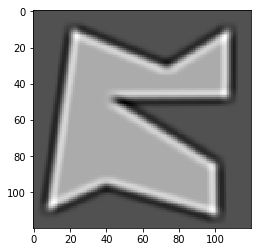

In [168]:
imgplot = imshow(arr, cmap=cmap.get_cmap('gray_r'))

In [169]:
np.amin(arr2)

0.0

In [55]:
np.amax(arr2)

2.218775487855684

In [60]:
arr2 = (arr*10)*3

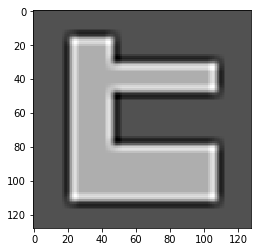

In [61]:
imgplot = imshow(arr2, cmap=cmap.get_cmap('gray_r'))

In [7]:
a = np.array(range(24))

In [8]:
a.shape

(24,)

In [13]:
b = np.reshape(a,(rows, columns, depth))

In [14]:
b.shape

(3, 4, 2)

In [18]:
b[0][2][0]

4

In [20]:
# im2 = imshow(b, cmap = cmap.get_cmap('hot_r'))
# colorbar(im2)

In [21]:
c = b.transpose()

In [25]:
c.shape

(2, 4, 3)

In [26]:
b

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7]],

       [[ 8,  9],
        [10, 11],
        [12, 13],
        [14, 15]],

       [[16, 17],
        [18, 19],
        [20, 21],
        [22, 23]]])

In [24]:
c

array([[[ 0,  8, 16],
        [ 2, 10, 18],
        [ 4, 12, 20],
        [ 6, 14, 22]],

       [[ 1,  9, 17],
        [ 3, 11, 19],
        [ 5, 13, 21],
        [ 7, 15, 23]]])